In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

## Here we tryna figure out if there's a gap in salary and why does it happen 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glassdoor-analyze-gender-pay-gap/Glassdoor Gender Pay Gap.csv


In [4]:
df = pd.read_csv("/kaggle/input/glassdoor-analyze-gender-pay-gap/Glassdoor Gender Pay Gap.csv")

In [5]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [22]:
grouped_by_g=df.groupby("Gender").agg({"Age":"median","PerfEval":"mean","BasePay":"mean"}).round(1)
grouped_by_g

,Age,PerfEval,BasePay
Gender,,,
Female,42.0,2.9,89942.8
Male,40.0,3.1,98457.5


In [20]:
df.isnull().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


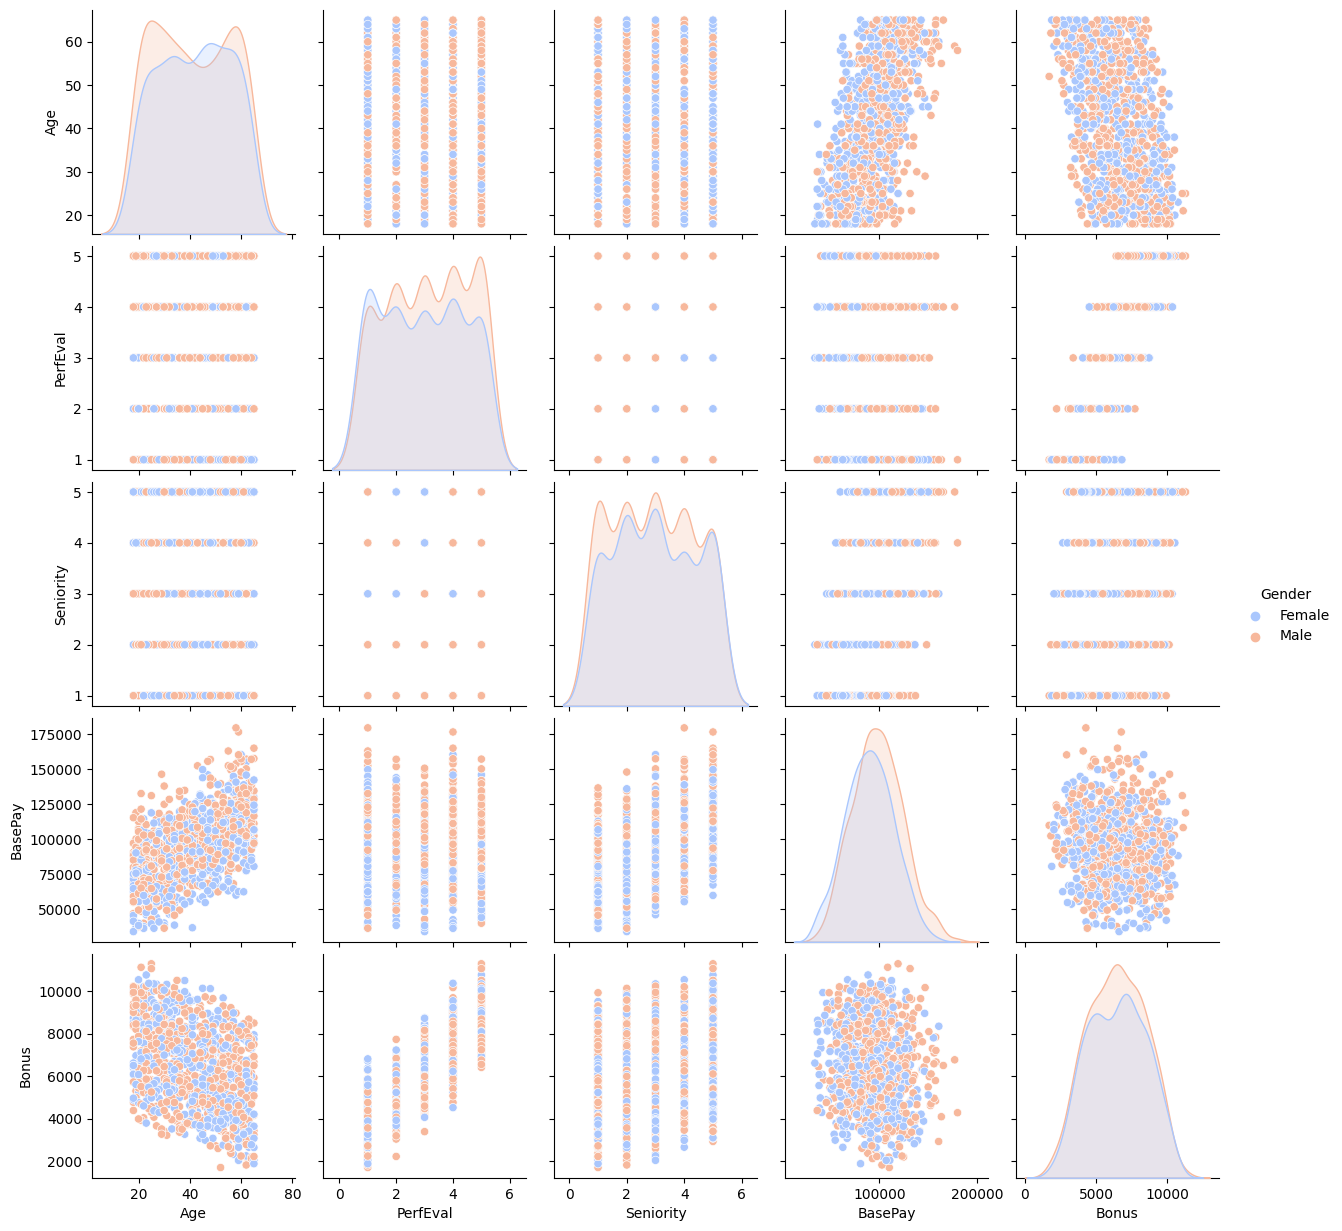

In [26]:
sns.pairplot(data =df, hue="Gender",palette = "coolwarm")

In [27]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [64]:
salaries_per_job=pd.DataFrame(df.groupby(["Dept","Gender"]).agg("first").reset_index())
salaries_per_job

,Dept,Gender,JobTitle,Age,PerfEval,Education,Seniority,BasePay,Bonus
0,Administration,Female,Warehouse Associate,19,4,PhD,5,90208,9268
1,Administration,Male,Software Engineer,19,5,Masters,4,100305,9618
2,Engineering,Female,Graphic Designer,33,5,High School,5,112976,9836
3,Engineering,Male,Graphic Designer,26,5,Masters,5,99464,9319
4,Management,Female,Driver,18,5,College,3,62759,10124
5,Management,Male,Software Engineer,21,5,College,5,108476,11128
6,Operations,Female,Graphic Designer,18,5,College,2,42363,9938
7,Operations,Male,Software Engineer,31,5,High School,3,92928,9094
8,Sales,Female,Graphic Designer,20,5,College,4,67585,10541
9,Sales,Male,Software Engineer,20,5,Masters,4,108080,10154


In [78]:
gender_counts = df.groupby('Dept')['Gender'].value_counts().unstack(fill_value=0)
gender_counts

Gender,Female,Male
Dept,,
Administration,95,98
Engineering,89,103
Management,87,111
Operations,96,114
Sales,101,106


In [ ]:
sns.barchart(data = gender_counts, x ="Fe",y=)

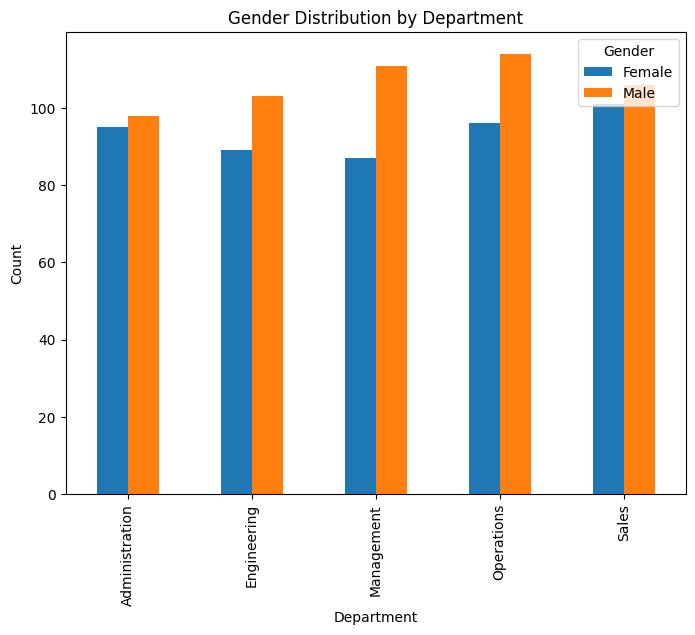

In [79]:
ax = gender_counts.plot(kind='bar', stacked=False, figsize=(8, 6))

# Customize the chart
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Gender Distribution by Department')
plt.legend(title='Gender', loc='upper right')

# Display the chart
plt.show()

In [81]:
# category_counts = df.groupby(['Dept', 'Category']).size().reset_index(name='Counts')


<Axes: xlabel='Dept', ylabel='BasePay'>

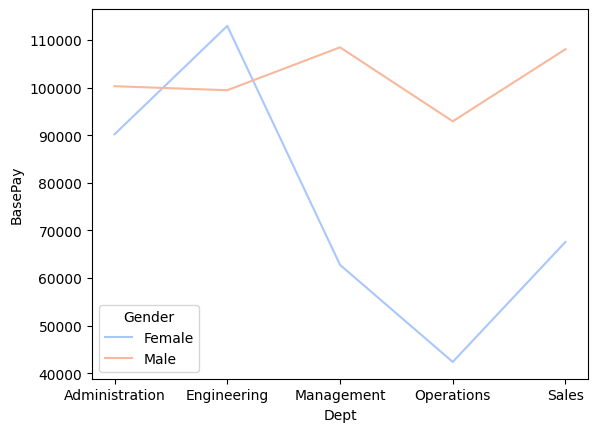

In [75]:
sns.lineplot(data = salaries_per_job, x ="Dept", y="BasePay", hue="Gender",palette = "coolwarm")

<Axes: >

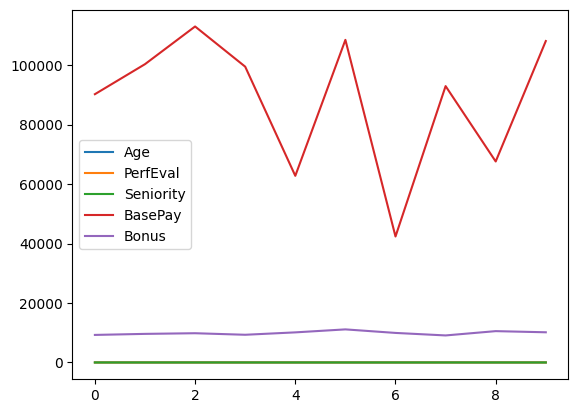

In [80]:
salaries_per_job.plot()